Trisomy

In [2]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def multinomial_rvs(counts, p, rng=None):
    """
    Simulate multinomial sampling of D dimensional probability distribution

    Arguments:
        counts: number of draws from distribution - int or array of the 
                ints (N)
        p: probability  - array of the floats (D, N)
        rng: np.random.default_rng() object, Optional
    Returns:
        Multinomial sample
    """

    if rng is None:
        rng = np.random.default_rng()

    if not isinstance(counts, (np.ndarray)):
        counts = np.full(p[0, ...].shape, counts)

    out = np.zeros(np.shape(p), dtype=int)
    ps = np.cumsum(p[::-1, ...], axis=0)[::-1, ...]
    # Conditional probabilities
    with np.errstate(divide='ignore', invalid='ignore'):
        condp = p / ps
    condp[np.isnan(condp)] = 0.0

    for i in range(p.shape[0]-1):
        binsample = rng.binomial(counts, condp[i, ...])
        out[i, ...] = binsample
        counts -= binsample

    out[-1, ...] = counts

    return out

    def trisomy_evolve(mudw, mu, gamma, time_interval):
    # generate rate matrix for 3 alleles
    RateMatrix = np.array([[-3*gamma, mu, 0, 0], 
                            [3*gamma, -(mu+2*gamma), 2*mu, 0], 
                            [0, 2*gamma, -(2*mu+gamma), 3*mu],
                            [0, 0, gamma, -3*mu]])
    
    ProbStates = linalg.expm(RateMatrix * time_interval) @ mudw

    m_cancer, u_cancer, d_cancer, w_cancer = multinomial_rvs(1, ProbStates, rng)

    return m_cancer, u_cancer, d_cancer, w_cancer


def trisomy_evolve(mudw, mu, gamma, time_interval):
    # generate rate matrix for 3 alleles
    RateMatrix = np.array([[-3*gamma, mu, 0, 0], 
                            [3*gamma, -(mu+2*gamma), 2*mu, 0], 
                            [0, 2*gamma, -(2*mu+gamma), 3*mu],
                            [0, 0, gamma, -3*mu]])
    
    ProbStates = linalg.expm(RateMatrix * time_interval) @ mudw

    m_cancer, u_cancer, d_cancer, w_cancer = multinomial_rvs(1, ProbStates, rng)

    return m_cancer, u_cancer, d_cancer, w_cancer

In [5]:
def single_cell_methylation(mudw, mu, gamma, time_interval):
    """
    Simulate methylation state evolution of a single cell.

    Arguments:
        mudw: Initial distribution of methylation states (array-like).
        mu: Mutation rate.
        gamma: Rate of environmental change.
        time_interval: Time over which to simulate changes.

    Returns:
        Updated state of the cell.
    """
    # Define the transition rate matrix for 3 states (unmethylated, 50% methylated, 100% methylated)
    RateMatrix = np.array([[-3*gamma, mu, 0, 0], 
                            [3*gamma, -(mu+2*gamma), 2*mu, 0], 
                            [0, 2*gamma, -(2*mu+gamma), 3*mu],
                            [0, 0, gamma, -3*mu]])
    
    # Calculate the probability distribution after the given time interval
    ProbStates = linalg.expm(RateMatrix * time_interval) @ mudw
    
    # Sample the new state based on the evolved probabilities
    new_state = np.random.choice([0, 1, 2, 3], p=ProbStates)
    
    return new_state

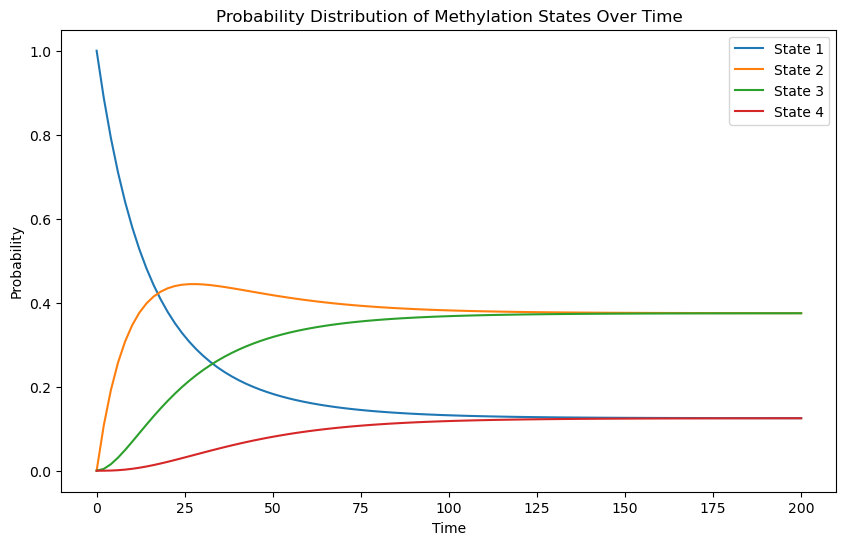

In [14]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# Initial parameters
initial_state = np.array([1, 0, 0, 0])  # Start fully in State 1
mu = 0.02                           # Mutation rate
gamma = 0.02                            # Environmental rate
time_points = np.linspace(0, 200, 100)   # Array of time points

# Transition rate matrix
RateMatrix = np.array([[-3*mu, gamma, 0, 0], 
                            [3*mu, -(gamma+2*mu), 2*gamma, 0], 
                            [0, 2*mu, -(2*gamma+mu), 3*gamma],
                            [0, 0, mu, -3*gamma]])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates)  # Normalize to ensure sum = 1

plt.figure(figsize=(10, 6))
for state in range(4):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()


Tetraploidy

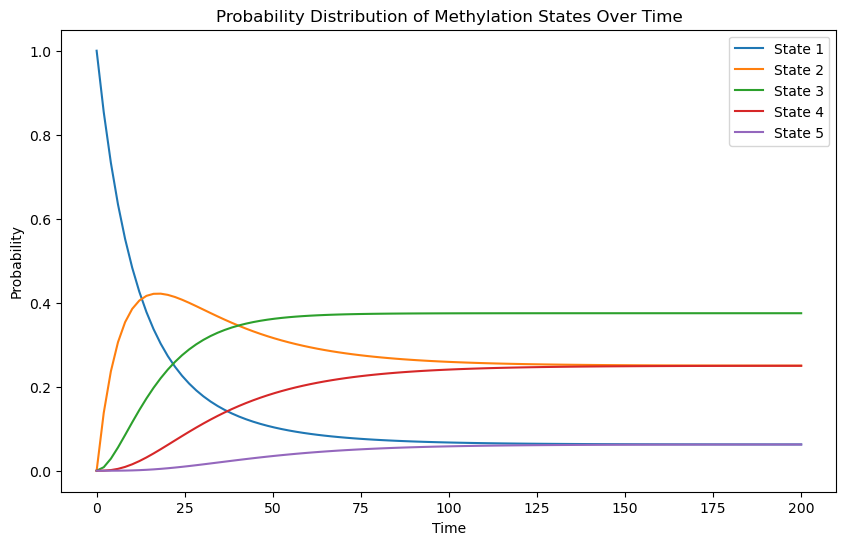

In [6]:
# Initial parameters
initial_state = np.array([1, 0, 0, 0, 0])  
mu = 0.02             #methylation rate            
gamma = 0.02          #demethylation rate 
time_points = np.linspace(0, 200, 100)   

# Transition rate matrix
RateMatrix = np.array([
    [-4*mu, gamma, 0, 0, 0],                
    [4*mu, -(3 * mu + gamma), 2 * gamma, 0, 0], 
    [0, 3 * mu, -(2 * mu + 2*gamma), 3*gamma, 0], 
    [0, 0, 2*mu, -(3*gamma+mu), 4*gamma],
    [0, 0, 0, mu, -4*gamma]           
])
# Calculate probability distributions over time
Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates)  # Normalize to ensure sum = 1

# Plot the probability distributions over time
plt.figure(figsize=(10, 6))
for state in range(5):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()

Trisomy State simulationn

In [18]:
def state_simulation(mu, gamma):
    rng = np.random.default_rng()
    m=1
    k=0
    d=0
    w=0
    dt=1

    p_m_to_k = 3*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 2*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_w = mu * dt if d == 1 else 0      
    p_w_to_d = 3*gamma * dt if w == 1 else 0    

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, w = 0, 1, 0, 0 

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, w = 1, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, w = 0, 0, 1, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, w = 0, 1, 0, 0
            
        elif rng.random() < p_d_to_w:
            m, k, d, w = 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_d:
            m, k, d, w = 0, 0, 1, 0

    return [m, k, d, w]

I think i need to modify this so that once the simulation has been run the the new state is saved and then input into the state simulation function as right now I think it is just repeating the transition from state m to state k

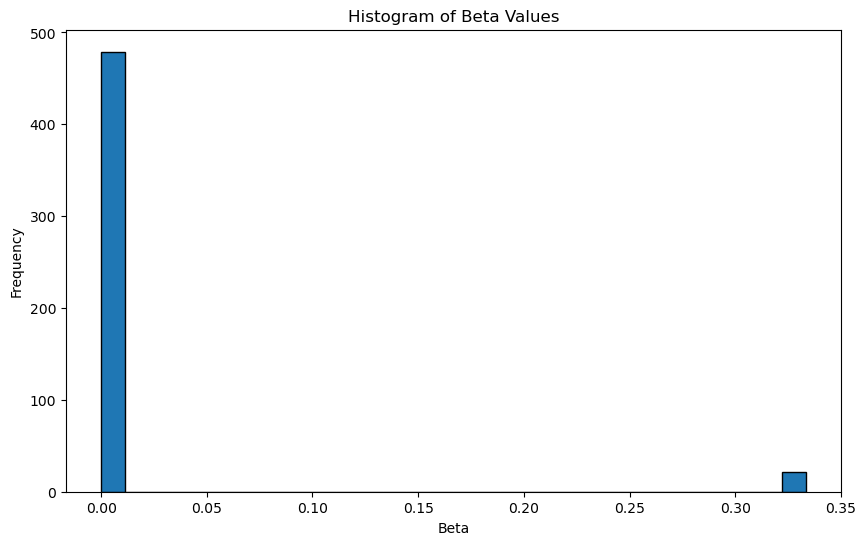

In [26]:
x = []

def run_simulation():
    mu=0.02
    gamma=0.02
    x.append(state_simulation(mu,gamma))
    return x

for i in range(500):
    run_simulation()

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

w_list = []
w_vals = [subarray[3] for subarray in x]
w_list.append([])


# Calculate beta values
beta_vals = [(k + 2 * d + 3 * w) / 3 for k, d, w in zip(k_vals, d_vals, w_vals)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()

Tetraploidy state simulation

In [ ]:
def state_simulation(mu, gamma):
    rng = np.random.default_rng()
    m=1
    k=0
    d=0
    v=0
    w=0
    dt=1

    p_m_to_k = 4*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 3*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_v = 2*mu * dt if d == 1 else 0      
    p_v_to_d = 3*gamma * dt if v == 1 else 0    
    p_v_to_w = mu * dt if v == 1 else 0      
    p_w_to_v = 4*gamma * dt if w == 1 else 0      

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, v, w = 1, 0, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0
            
        elif rng.random() < p_d_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0
    
    elif v == 1:
        if rng.random() < p_v_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0
            
        elif rng.random() < p_v_to_w:
            m, k, d, v, w = 0, 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0

    return [m, k, d, v, w]

x = []

def run_simulation():
    mu=0.02
    gamma=0.02
    x.append(state_simulation(mu,gamma))
    return x

for i in range(500):
    run_simulation()

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

v_list = []
v_vals = [subarray[3] for subarray in x]
v_list.append([])

w_list = []
w_vals = [subarray[4] for subarray in x]
w_list.append([])


# Calculate beta values
beta_vals = [(k + 2 * d + 3 * v + 4 * w) / 4 for k, d, w in zip(k_vals, d_vals, v_vals, w_vals)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()